In [1]:
using ViscousFlow

In [2]:
using Plots

In [3]:
gr(size=(500,500), html_output_format=:png)

Plots.GRBackend()

In [4]:
Re = 200; # Reynolds number
U = 1.0; # Free stream velocity
U∞ = (U,0.0);

In [5]:
xlim = (-1.0,3.0)
ylim = (-1.0,1.0);
Δx, Δt = setstepsizes(Re,gridRe=4.0)

(0.02, 0.01)

In [6]:
body = Plate(1.0,1.0Δx)
T = RigidTransform((0.,0.),0.)
T(body)

Plate with 50 points and length 1.0 and thickness 0.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [7]:
a = 0.25 # location of pitch axis, a = 0.5 is leading edge
ϕp = -π/2  # phase lag of pitch
ϕh = π/2  # phase lag of heave
A = 0.25  # amplitude/chord
fstar = 1/π # fc/U
α₀ = π/2 # mean angle of attack
Δα = 10π/180 # amplitude of pitching
U₀ = 0.0 # translational motion (set to zero in place of free stream)
K = π*fstar # reduced frequency, K = πfc/U

oscil1 = RigidBodyTools.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh)
motion = RigidBodyMotion(oscil1)

Rigid Body Motion:
  ċ = 0.0 + 0.0im
  c̈ = 0.17 - 1.03im
  α̇ = 0.0
  α̈ = 0.7
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.25
     Pitching amplitude Δα = 0.17453292519943295
     Pitch lag ϕp = -1.5707963267948966
     Heave lag ϕh = 1.5707963267948966


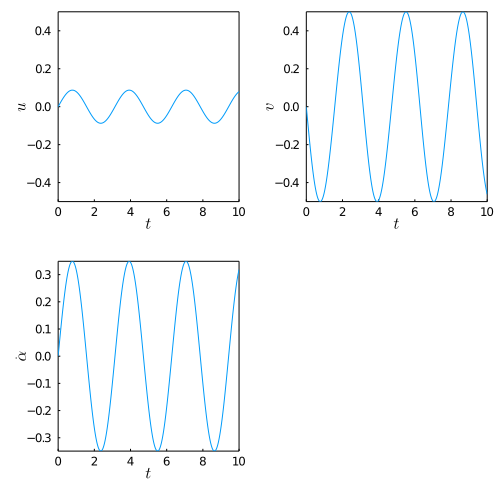

In [8]:
plot(motion)

In [9]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,body,motion,freestream = U∞)

LoadError: MethodError: no method matching NavierStokes(::Int64, ::Float64, ::Tuple{Float64,Float64}, ::Tuple{Float64,Float64}, ::Float64, ::Plate{50,RigidBodyTools.OpenBody}, ::RigidBodyMotion; freestream=(1.0, 0.0))
Closest candidates are:
  NavierStokes(::Any, ::Any, ::Tuple{Real,Real}, ::Tuple{Real,Real}, ::Any; U∞, X̃, isstore, isstatic, isasymptotic, isfilter, rk, ddftype) at /Users/fardinhaque/.julia/packages/ViscousFlow/bXeta/src/navier_stokes.jl:98 got unsupported keyword argument "freestream"

In [10]:
u0 = newstate(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

LoadError: UndefVarError: newstate not defined

In [11]:
step!(integrator,1.0)

LoadError: UndefVarError: step! not defined

In [12]:
plot(vorticity(integrator),sys,clim=(-10,10),levels=range(-10,10,length=30),color = :RdBu)

LoadError: UndefVarError: integrator not defined

In [13]:
sol = integrator.sol;
@gif for t in sol.t
    plot(vorticity(sol,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end every 5

LoadError: UndefVarError: integrator not defined

In [14]:
sol = integrator.sol
fx, fy = force(sol,sys,1);

LoadError: UndefVarError: integrator not defined

In [15]:
plot(
plot(sol.t,2*fx,xlim=(0,Inf),ylim=(-3,3),xlabel="Convective time",ylabel="\$C_D\$",legend=:false),
plot(sol.t,2*fy,xlim=(0,Inf),ylim=(-6,6),xlabel="Convective time",ylabel="\$C_L\$",legend=:false),
    size=(800,350)
)

LoadError: UndefVarError: fx not defined